# Import librairies

In [1]:
# To check PEP8 need installation : pip install flake8 pycodestyle pycodestyle_magic
# add %%flake8 in each block to check it
%load_ext pycodestyle_magic

In [2]:
# %%flake8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.dummy import DummyClassifier
#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, \
    GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, \
    cross_validate, KFold, RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer, roc_curve, \
    roc_auc_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import shap
import pickle

# Load data files

In [3]:
# %%flake8

data_train = pd.read_csv('data_train.csv')

# Overview of data

In [4]:
# To optimize display of the Dataframe

#increase max rows displayed to 999
pd.set_option('display.max_rows', 999)

#increase max columns displayed to 999
pd.set_option('display.max_columns', 999)
#increase columns width to 100
pd.set_option('display.max_colwidth', 200)

# Formating float
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# %%flake8

# define random_state
rd_state = 16

**Train data**

In [6]:
data_train.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

In [7]:
data_train.describe(include='all')

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

In [8]:
data_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 245 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    SK_ID_CURR                                         307511 non-null  int64  
 1    NAME_CONTRACT_TYPE                                 307511 non-null  int64  
 2    FLAG_OWN_CAR                                       307511 non-null  int64  
 3    FLAG_OWN_REALTY                                    307511 non-null  int64  
 4    CNT_CHILDREN                                       307511 non-null  int64  
 5    AMT_INCOME_TOTAL                                   307511 non-null  float64
 6    AMT_CREDIT                                         307511 non-null  float64
 7    AMT_ANNUITY                                        307499 non-null  float64
 8    AMT_GOODS_PRICE                                    307233 non-

In [9]:
print('data_train number of rows : {}' .format(data_train.shape[0]))
print('data_train number of columns : {}' .format(data_train.shape[1]))

data_train number of rows : 307511
data_train number of columns : 245


# Modelization test

## Split train / test data

In [10]:
# %%flake8

# split data between features and target
X = data_train.drop(columns=['TARGET'])
y = data_train['TARGET']

# Feature names
features = list(data_train.drop(columns=['TARGET']).columns)

In [11]:
# %%flake8

# Separation training / testing set use stratify due to classes are imbalanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=rd_state, stratify=y)

In [12]:
# %%flake8

# sampling X_train
X_sample_train, X_sample_test, y_sample_train, y_sample_test = \
    train_test_split(
        X_train, y_train, train_size=0.2,
        random_state=rd_state, stratify=y_train)

## Testing model

In [13]:
# %%flake8

# dictionnary of score
# create a fbeta score
f2_scorer = make_scorer(fbeta_score, beta=2)
scores = {'AUC': 'roc_auc', 'fbeta': f2_scorer,
          'precision_recall_curve': 'average_precision'}

In [14]:
#define cv
cv=KFold(5,shuffle=True,random_state=0)

In [15]:
# %%flake8

def test_model_grid(X_train, y_train, steps, params):

    ''' create function to test different model '''

    pipeline = imbpipeline(steps=steps)

    grid = GridSearchCV(
        pipeline, param_grid=params, cv=cv, return_train_score=True,
        scoring=scores, refit='precision_recall_curve', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

In [16]:
# %%flake8

def test_model_randomsearch(X_train, y_train, steps, params, nb_iter):

    ''' create function to test different model '''

    pipeline = imbpipeline(steps=steps)

    randomscv = RandomizedSearchCV(
        pipeline, param_distributions=params, n_iter=nb_iter,
        cv=cv, return_train_score=True,
        scoring=scores, refit='precision_recall_curve', random_state=rd_state, n_jobs=-1)
    randomscv.fit(X_train, y_train)
    return randomscv

In [17]:
# %%flake8

def pipeline_steps(classifier):
    ''' function to create steps of a pipeline '''
    # parameters to test models

    # Median imputation of missing values
    imputer = SimpleImputer(strategy='median')

    # Normalize values
    scaler = StandardScaler()

    # class are imbalanced
    # oversampling of the minority class
    over = SMOTE(random_state=rd_state)

    # undersampling of the majority class
    under = RandomUnderSampler(random_state=rd_state)

    # steps for the pipeline
    steps = [['imputer', imputer], ['scaler', scaler],
             ['over', over], ['under', under],
             ['classifier', classifier]]
    return steps

### Dumy classifier

In [18]:
# %%flake8

# parameters to test for DummyClassifier

# classifier to test
steps_dc = pipeline_steps(DummyClassifier(random_state=rd_state))

# parameters to test
params_dc = {}

# Number of iteration
n_iter_dc = 1

In [19]:
# # %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_dc = test_model_grid(
#     X_sample_train, y_sample_train, steps_dc, params_dc)

In [20]:
%%time

# %%flake8

random_dc = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_dc, params_dc, n_iter_dc)

Wall time: 21.4 s


In [21]:
# %%flake8

def display_result(grid, model):
    ''' create function to display dataframe of the results '''
    results = pd.DataFrame(grid.cv_results_)
    results.insert(0, 'Model', model)
    display(results)
    return results

In [22]:
# %%flake8

# use function display_result to display dataframe
# of the result for DummyClassifier
results_dc = display_result(
    random_dc, 'DummyClassifier')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,DummyClassifier,6.21,1.63,0.59,0.08,{},0.50,0.50,0.50,0.50,0.50,0.50,0.00,1,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.08,0.09,0.08,0.08,0.08,0.00,1,0.08,0.08,0.08,0.08,0.08,0.08,0.00


In [23]:
# %%flake8

def display_score(result, grid):
    ''' create function to display score and best params for a model '''

    print('Fit time: %.2f' % result.loc[grid.best_index_]['mean_fit_time'])
    print('AUC score: %.3f' % result.loc[grid.best_index_]['mean_test_AUC'])
    print('f2score: %.3f' % result.loc[grid.best_index_]
          ['mean_test_fbeta'])
    print('precision_recall_curve score: %.3f' % grid.best_score_)
    print('Best parameters: %s' % grid.best_params_)

In [24]:
# %%flake8
# use function display_score to display score and
# best_params for DummyClassifier
display_score(results_dc, random_dc)

Fit time: 6.21
AUC score: 0.500
f2score: 0.000
precision_recall_curve score: 0.081
Best parameters: {}


In [25]:
# %%flake8

# save results to csv
results_dc.to_csv('results_dummyclassifier.csv', index = False)

### Logistic Regression

In [26]:
# %%flake8

# parameters to test for LogisticRegression

# classifier to test
steps_lr = pipeline_steps(LogisticRegression(random_state=rd_state, max_iter=10000))

# parameters to test
params_lr = {'classifier__C': [0.1, 1, 10, 100],
                             'over__sampling_strategy': [0.1, 0.2, 0.3],
                             'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_lr = 30

In [27]:
# %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_lr = test_model_grid(
#     X_sample_train, y_sample_train, steps_lr,
#     params_lr)

In [28]:
%%time

# %%flake8

random_lr = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_lr, params_lr, n_iter_lr)

Wall time: 9min 54s


In [29]:
# %%flake8

# use function display_result to display
# dataframe of the result for LogisticRegression
results_lr = display_result(random_lr, 'LogisticRegression')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__C,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,LogisticRegression,20.12,3.15,0.67,0.09,0.40,0.20,100,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__C': 100}",0.74,0.72,0.73,0.74,0.73,0.73,0.01,15,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.32,0.31,0.32,0.31,0.31,0.31,0.01,22,0.33,0.34,0.33,0.33,0.34,0.33,0.00,0.22,0.21,0.23,0.21,0.19,0.21,0.01,13,0.22,0.23,0.22,0.23,0.24,0.23,0.01
1,LogisticRegression,8.59,0.64,0.71,0.04,0.50,0.30,0.10,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__C': 0.1}",0.74,0.72,0.73,0.74,0.73,0.73,0.01,20,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.35,0.33,0.35,0.35,0.34,0.34,0.01,20,0.36,0.37,0.36,0.37,0.37,0.37,0.00,0.22,0.20,0.23,0.20,0.19,0.21,0.01,21,0.22,0.23,0.22,0.23,0.23,0.23,0.00
2,LogisticRegression,12.03,0.41,0.73,0.03,0.60,0.20,10,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.2, 'classifier__C': 10}",0.74,0.72,0.73,0.74,0.72,0.73,0.01,18,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.37,0.35,0.38,0.37,0.37,0.37,0.01,11,0.39,0.39,0.39,0.39,0.39,0.39,0.00,0.22,0.21,0.23,0.20,0.19,0.21,0.01,16,0.22,0.23,0.22,0.22,0.23,0.23,0.00
3,LogisticRegression,10.49,0.69,0.66,0.02,0.50,0.10,100,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__C': 100}",0.74,0.73,0.73,0.74,0.73,0.73,0.00,9,0.75,0.76,0.75,0.75,0.76,0.75,0.00,0.35,0.34,0.36,0.34,0.34,0.35,0.01,18,0.37,0.37,0.37,0.37,0.37,0.37,0.00,0.22,0.21,0.23,0.20,0.19,0.21,0.01,19,0.22,0.23,0.22,0.22,0.23,0.22,0.01
4,LogisticRegression,9.22,0.26,0.66,0.04,0.40,0.30,0.10,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3, 'classifier__C': 0.1}",0.74,0.72,0.73,0.74,0.72,0.73,0.01,21,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.31,0.30,0.31,0.32,0.31,0.31,0.00,27,0.33,0.33,0.32,0.32,0.33,0.33,0.00,0.22,0.20,0.23,0.20,0.19,0.21,0.02,4,0.22,0.23,0.22,0.23,0.23,0.23,0.00
5,LogisticRegression,14.78,1.42,0.72,0.03,0.60,0.20,100,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.2, 'classifier__C': 100}",0.74,0.72,0.73,0.74,0.72,0.73,0.01,19,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.37,0.35,0.38,0.37,0.37,0.37,0.01,9,0.39,0.39,0.39,0.39,0.39,0.39,0.00,0.22,0.21,0.23,0.20,0.19,0.21,0.01,17,0.22,0.23,0.22,0.22,0.23,0.23,0.00
6,LogisticRegression,14.49,0.92,0.75,0.05,0.40,0.20,10,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__C': 10}",0.74,0.72,0.73,0.74,0.73,0.73,0.01,13,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.32,0.31,0.32,0.31,0.31,0.31,0.01,21,0.33,0.34,0.33,0.33,0.34,0.33,0.00,0.22,0.21,0.23,0.20,0.19,0.21,0.01,10,0.22,0.23,0.22,0.23,0.24,0.23,0.01
7,LogisticRegression,15.02,0.76,0.73,0.02,0.40,0.30,1,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3, 'classifier__C': 1}",0.74,0.72,0.73,0.73,0.72,0.73,0.01,24,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.31,0.30,0.31,0.32,0.31,0.31,0.01,25,0.33,0.33,0.32,0.33,0.33,0

In [30]:
# %%flake8

# use function display_score to display score and
# best_params for LogisticRegression
display_score(results_lr, random_lr)

Fit time: 5.35
AUC score: 0.734
f2score: 0.303
precision_recall_curve score: 0.212
Best parameters: {'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__C': 0.1}


In [31]:
# %%flake8

# save results to csv
results_lr.to_csv('results_logisticregression.csv', index = False)

### Random Forest Classifier

In [32]:
# %%flake8

# parameters to test for RandomForestClassifier

# classifier to test
steps_rfc = pipeline_steps(RandomForestClassifier(random_state=rd_state))

# parameters to test
params_rfc = {
    'classifier__max_depth': np.arange(10, 50, 5),
    'classifier__min_samples_split': np.arange(2, 20, 2),
    'classifier__bootstrap': [True],
    'over__sampling_strategy': [0.1, 0.2, 0.3],
    'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_rfc = 25

In [33]:
# %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_rfc = test_model_grid(
#     X_sample_train, y_sample_train, steps_rfcr,
#     params_rfc)

In [34]:
%%time

# %%flake8

random_rfc = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_rfc, params_rfc, n_iter_rfc)

Wall time: 8min 20s


In [35]:
# %%flake8

# use function display_result to display
# dataframe of the result for RandomForestClassifier
results_rfc = display_result(
    random_rfc, 'RandomForestClassifier')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__min_samples_split,param_classifier__max_depth,param_classifier__bootstrap,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,RandomForestClassifier,6.86,0.03,1.09,0.03,0.60,0.10,14,35,True,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 14, 'classifier__max_depth': 35, 'classifier__bootstrap': True}",0.74,0.72,0.73,0.73,0.72,0.73,0.01,1,0.97,0.97,0.97,0.97,0.97,0.97,0.00,0.32,0.29,0.30,0.32,0.30,0.31,0.01,3,0.79,0.78,0.79,0.79,0.79,0.79,0.00,0.22,0.18,0.21,0.21,0.18,0.20,0.01,8,0.76,0.74,0.75,0.77,0.75,0.76,0.01
1,RandomForestClassifier,6.24,0.21,0.85,0.05,0.50,0.10,12,10,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 12, 'classifier__max_depth': 10, 'classifier__bootstrap': True}",0.74,0.71,0.73,0.73,0.72,0.72,0.01,3,0.86,0.86,0.86,0.86,0.86,0.86,0.00,0.20,0.18,0.17,0.19,0.17,0.18,0.01,8,0.34,0.35,0.33,0.35,0.33,0.34,0.01,0.21,0.20,0.22,0.20,0.18,0.20,0.01,4,0.39,0.38,0.38,0.41,0.40,0.39,0.01
2,RandomForestClassifier,7.00,0.24,1.18,0.09,0.50,0.10,2,25,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 2, 'classifier__max_depth': 25, 'classifier__bootstrap': True}",0.73,0.72,0.72,0.72,0.71,0.72,0.00,10,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.24,0.25,0.24,0.25,0.24,0.25,0.00,4,0.90,0.89,0.90,0.90,0.89,0.89,0.00,0.20,0.19,0.21,0.20,0.18,0.20,0.01,12,0.98,0.98,0.98,0.98,0.98,0.98,0.00
3,RandomForestClassifier,14.69,0.33,1.13,0.10,0.50,0.30,14,35,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__min_samples_split': 14, 'classifier__max_depth': 35, 'classifier__bootstrap': True}",0.72,0.70,0.71,0.70,0.71,0.71,0.01,21,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.01,0.02,0.03,0.01,0.02,0.02,0.01,21,0.67,0.70,0.68,0.69,0.69,0.68,0.01,0.20,0.18,0.21,0.18,0.16,0.19,0.02,19,0.97,0.97,0.97,0.98,0.97,0.97,0.00
4,RandomForestClassifier,14.54,0.31,1.14,0.07,0.50,0.30,2,20,True,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.3, 'classifier__min_samples_split': 2, 'classifier__max_depth': 20, 'classifier__bootstrap': True}",0.72,0.70,0.71,0.71,0.70,0.71,0.01,22,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.02,0.02,0.04,0.03,0.03,0.03,0.01,18,0.93,0.94,0.93,0.94,0.93,0.93,0.00,0.20,0.17,0.20,0.18,0.16,0.18,0.02,24,0.99,0.99,0.99,0.99,0.99,0.99,0.00
5,RandomForestClassifier,17.01,0.21,1.15,0.08,0.40,0.30,14,35,True,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3, 'classifier__min_samples_split': 14, 'classifier__max_depth': 35, 'classifier__bootstrap': True}",0.72,0.69,0.71,0.71,0.70,0.70,0.01,23,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.00,23,0.56,0.59,0.57,0.59,0.58,0.58,0.01,0.20,0.17,0.21,0.18,0.16,0.18,0.02,20,0.99,0.99,0.99,0.99,0.99,0.99,0.00
6,RandomForestClassifier,6.32,0.25,1.12,0.09,0.60,0.10,10,30,Tr

In [36]:
# %%flake8

# use function display_score to display score and
# best_params for RandomForestClassifier
display_score(results_rfc, random_rfc)

Fit time: 6.97
AUC score: 0.724
f2score: 0.141
precision_recall_curve score: 0.205
Best parameters: {'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 8, 'classifier__max_depth': 15, 'classifier__bootstrap': True}


In [37]:
# %%flake8

# save results to csv
results_rfc.to_csv('results_randomforestclassifier.csv', index = False)

### Hist Gradient Boosting Classifier

In [38]:
# %%flake8

# parameters to test for HistGradientBoostingClassifier

# classifier to test
steps_hgbc = pipeline_steps(HistGradientBoostingClassifier(random_state=rd_state))

# parameters to test
params_hgbc = {
    'classifier__loss': ['binary_crossentropy'],
    'classifier__learning_rate': np.arange(0.05,0.2, 0.05),
    'classifier__max_iter':np.arange(100,400, 100),
    'classifier__max_depth': np.arange(10, 100, 10),
    'over__sampling_strategy': [0.1, 0.2, 0.3],
    'under__sampling_strategy': [0.4, 0.5, 0.6]}

# Number of iteration
n_iter_hgbc = 25

In [39]:
# %%flake8

# gridsearch is too long

# # use function test_model_grid
# grid_hgbc = test_model_grid(
#     X_sample_train, y_sample_train, steps_hgbc,
#     params_hgbc)

In [40]:
%%time

# %%flake8

random_hgbc = test_model_randomsearch(
    X_sample_train, y_sample_train, steps_hgbc, params_hgbc, n_iter_hgbc)

Wall time: 10min 31s


In [41]:
# %%flake8

# use function display_result to display
# dataframe of the result for RandomForestClassifier
results_hgbc = display_result(
    random_hgbc, 'HistGradientBoostingClassifier')

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__max_iter,param_classifier__max_depth,param_classifier__loss,param_classifier__learning_rate,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve
0,HistGradientBoostingClassifier,23.45,3.27,0.88,0.09,0.40,0.30,200,90,binary_crossentropy,0.10,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.3, 'classifier__max_iter': 200, 'classifier__max_depth': 90, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.74,0.72,0.73,0.73,0.73,0.73,0.01,10,0.93,0.92,0.93,0.87,0.88,0.90,0.02,0.06,0.05,0.06,0.05,0.05,0.05,0.00,24,0.24,0.21,0.20,0.13,0.14,0.19,0.04,0.23,0.20,0.23,0.21,0.19,0.21,0.02,6,0.65,0.61,0.61,0.45,0.46,0.56,0.08
1,HistGradientBoostingClassifier,9.18,0.82,0.62,0.04,0.60,0.20,100,60,binary_crossentropy,0.20,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.2, 'classifier__max_iter': 100, 'classifier__max_depth': 60, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.74,0.72,0.73,0.72,0.72,0.73,0.01,16,0.84,0.85,0.87,0.86,0.88,0.86,0.01,0.23,0.24,0.23,0.21,0.22,0.23,0.01,11,0.35,0.37,0.40,0.40,0.44,0.39,0.03,0.22,0.20,0.21,0.19,0.19,0.20,0.01,17,0.34,0.37,0.39,0.40,0.41,0.38,0.02
2,HistGradientBoostingClassifier,14.29,1.48,0.73,0.03,0.40,0.20,200,20,binary_crossentropy,0.15,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__max_iter': 200, 'classifier__max_depth': 20, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.74,0.73,0.74,0.73,0.72,0.73,0.00,14,0.92,0.87,0.90,0.91,0.89,0.90,0.02,0.13,0.15,0.15,0.12,0.13,0.14,0.01,17,0.40,0.25,0.32,0.36,0.31,0.33,0.05,0.22,0.21,0.24,0.19,0.18,0.21,0.02,14,0.58,0.41,0.48,0.54,0.47,0.50,0.06
3,HistGradientBoostingClassifier,11.85,1.76,0.69,0.05,0.40,0.20,100,80,binary_crossentropy,0.20,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.2, 'classifier__max_iter': 100, 'classifier__max_depth': 80, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.74,0.72,0.72,0.72,0.72,0.72,0.01,20,0.87,0.87,0.93,0.90,0.87,0.89,0.02,0.14,0.15,0.15,0.13,0.12,0.14,0.01,16,0.29,0.29,0.47,0.34,0.30,0.34,0.07,0.21,0.20,0.21,0.20,0.18,0.20,0.01,18,0.44,0.43,0.60,0.50,0.43,0.48,0.06
4,HistGradientBoostingClassifier,26.04,0.17,1.07,0.04,0.60,0.10,300,80,binary_crossentropy,0.20,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy': 0.1, 'classifier__max_iter': 300, 'classifier__max_depth': 80, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.73,0.72,0.71,0.71,0.70,0.71,0.01,24,0.98,0.98,0.98,0.98,0.98,0.98,0.00,0.37,0.35,0.35,0.34,0.33,0.35,0.01,2,0.76,0.76,0.76,0.75,0.76,0.76,0.00,0.21,0.19,0.21,0.19,0.18,0.20,0.01,23,0.72,0.72,0.72,0.73,0.73,0.72,0.00
5,HistGradientBoostingClassifier,25.99,0.08,1.05,0.05,0.60,0.10,300,40,binary_crossentropy,0.20,"{'under__sampling_strategy': 0.6, 'over__sampling_strategy

In [42]:
# %%flake8

# use function display_score to display score and
# best_params for GradientBoostingClassifier
display_score(results_hgbc, random_hgbc)

Fit time: 12.72
AUC score: 0.740
f2score: 0.335
precision_recall_curve score: 0.217
Best parameters: {'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__max_iter': 100, 'classifier__max_depth': 30, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': 0.05}


In [43]:
# %%flake8

# save results to csv
results_hgbc.to_csv('results_histgradientboostingclassifier.csv', index = False)

## Compare models

In [44]:
# %%flake8

# create a dataframe with the best parameters for each model
result = pd.concat([results_dc.iloc[[random_dc.best_index_]],
                    results_lr.iloc[[random_lr.best_index_]],
                    results_rfc.iloc[[random_rfc.best_index_]],
                    results_hgbc.iloc[[random_hgbc.best_index_]]])
result

,Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,mean_train_AUC,std_train_AUC,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,split0_train_fbeta,split1_train_fbeta,split2_train_fbeta,split3_train_fbeta,split4_train_fbeta,mean_train_fbeta,std_train_fbeta,split0_test_precision_recall_curve,split1_test_precision_recall_curve,split2_test_precision_recall_curve,split3_test_precision_recall_curve,split4_test_precision_recall_curve,mean_test_precision_recall_curve,std_test_precision_recall_curve,rank_test_precision_recall_curve,split0_train_precision_recall_curve,split1_train_precision_recall_curve,split2_train_precision_recall_curve,split3_train_precision_recall_curve,split4_train_precision_recall_curve,mean_train_precision_recall_curve,std_train_precision_recall_curve,param_under__sampling_strategy,param_over__sampling_strategy,param_classifier__C,param_classifier__min_samples_split,param_classifier__max_depth,param_classifier__bootstrap,param_classifier__max_iter,param_classifier__loss,param_classifier__learning_rate
0,DummyClassifier,6.21,1.63,0.59,0.08,{},0.50,0.50,0.50,0.50,0.50,0.50,0.00,1,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.08,0.09,0.08,0.08,0.08,0.00,1,0.08,0.08,0.08,0.08,0.08,0.08,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,LogisticRegression,5.35,0.60,0.58,0.08,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__C': 0.1}",0.74,0.73,0.74,0.74,0.73,0.73,0.00,1,0.75,0.76,0.75,0.75,0.76,0.75,0.00,0.31,0.30,0.32,0.29,0.30,0.30,0.01,30,0.32,0.33,0.32,0.32,0.32,0.32,0.00,0.22,0.20,0.24,0.20,0.19,0.21,0.02,1,0.23,0.23,0.22,0.23,0.24,0.23,0.00,0.40,0.10,0.10,NaN,NaN,NaN,NaN,NaN,NaN
12,RandomForestClassifier,6.97,0.19,1.02,0.08,"{'under__sampling_strategy': 0.4, 'over__sampling_strategy': 0.1, 'classifier__min_samples_split': 8, 'classifier__max_depth': 15, 'classifier__bootstrap': True}",0.73,0.71,0.73,0.73,0.72,0.72,0.01,5,0.95,0.95,0.95,0.95,0.95,0.95,0.00,0.15,0.15,0.16,0.11,0.14,0.14,0.02,12,0.59,0.59,0.58,0.57,0.60,0.58,0.01,0.22,0.19,0.22,0.20,0.19,0.21,0.01,1,0.71,0.70,0.70,0.73,0.71,0.71,0.01,0.40,0.10,NaN,8,15,True,NaN,NaN,NaN
8,HistGradientBoostingClassifier,12.72,0.14,0.78,0.01,"{'under__sampling_strategy': 0.5, 'over__sampling_strategy': 0.1, 'classifier__max_iter': 100, 'classifier__max_depth': 30, 'classifier__loss': 'binary_crossentropy', 'classifier__learning_rate': ...",0.75,0.74,0.75,0.74,0.73,0.74,0.01,1,0.84,0.84,0.84,0.84,0.84,0.84,0.00,0.34,0.34,0.34,0.34,0.32,0.34,0.01,4,0.45,0.45,0.45,0.46,0.46,0.45,0.01,0.22,0.22,0.24,0.21,0.19,0.22,0.02,1,0.33,0.33,0.34,0.33,0.35,0.34,0.01,0.50,0.10,NaN,NaN,30,NaN,100,binary_crossentropy,0.05


In [45]:
# %%flake8

def graph_score_model(results):
    ''' create a function du display graph of the score for each model '''

    width = 0.3
    plt.style.use('bmh')
    x = np.arange(len(results))
    n_col = len(scores)
    fig, ax = plt.subplots(1, n_col, figsize=(20, 6))
    fig.suptitle('Score per model\n', fontsize=15, fontweight='bold')
    i = 0
    for key, values in scores.items():
        ax[i].bar(x - width/2, results['mean_train_'+key],
                  width, label='Train')
        ax[i].bar(x+width/2, results['mean_test_'+key],
                  width, label='Test')
        ax[i].set_xlabel('\nModel')
        ax[i].set_ylabel('Score ' + key)
        ax[i].set_title('Score ' + key + ' per model')
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(results['Model'], rotation=45)
        ax[i].legend()
        i += 1

    # to save graph
    plt.savefig('Score per model.png', bbox_inches='tight')

    plt.show()

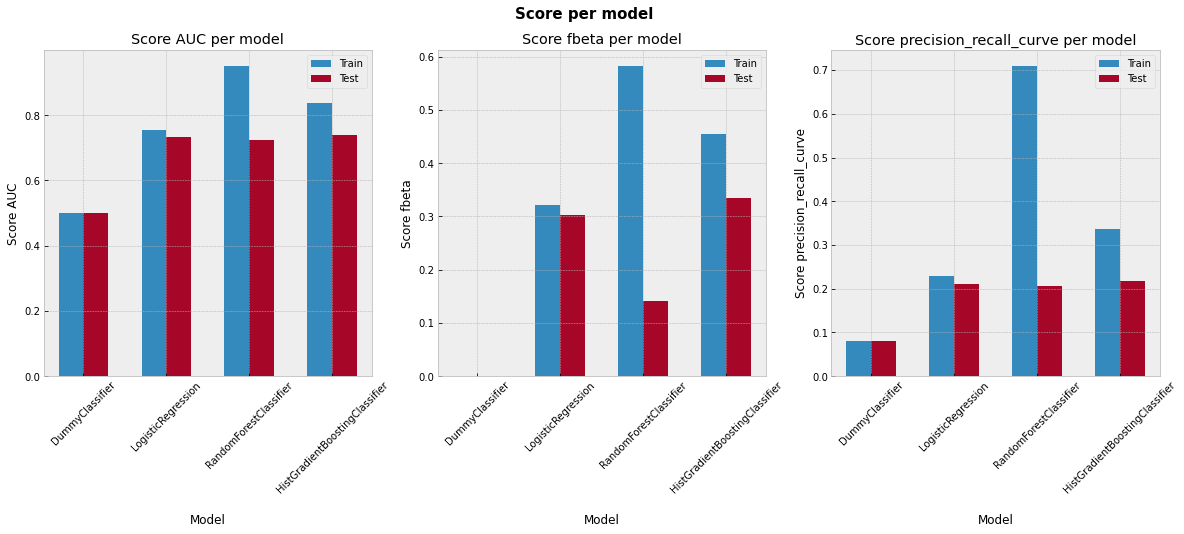

In [46]:
# %%flake8

# use function graph_score_model to display score for each models
graph_score_model(result)

For these 2 score(AUC, fbeta, precision_recal_curve) the biggest score is the better.

RandomForestClassifier seems to overfit.
The scores for LogisticsRegression and HistGradientBoostingClassifier are around the same and are the better.

In [47]:
# %%flake8

def graph_time_model(results):
    ''' create a function du display graph of the time for each model '''

    width = 0.2
    x = np.arange(len(results))
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.bar(x - width/2, results['mean_score_time'],
           width, label='Predict')
    ax.bar(x + width/2, results['mean_fit_time'],
           width, label='Fit')

    ax.set_xlabel('\nModel')
    ax.set_ylabel('Time(s)')
    plt.title('Time per model')
    plt.xticks(x, results['Model'], rotation=45)
    ax.legend()

    # to save graph
    plt.savefig('Time per model.png', bbox_inches='tight')

    plt.show()

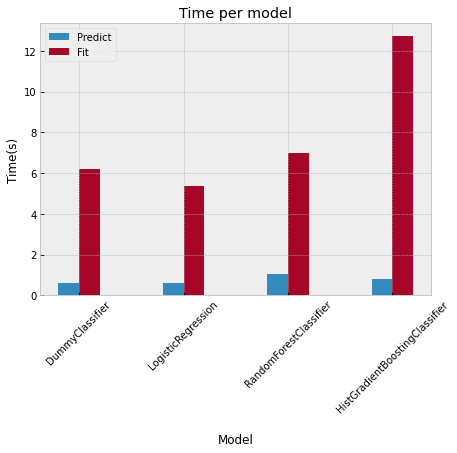

In [48]:
# %%flake8

# use function graph_time_model to display time for each models
graph_time_model(result)

The time speed of the model is better for LogisticsRegression than HistGradientBoostingClassifier

So the better compromise on score and time is the model LogisticsRegression

# Model analysis

## Predict values

In [49]:
# %%flake8

def predict_proba_y(model, X):
    ''' function to predict_proba for a model '''
    # predict probabilities for DummyClassifier
    y_predict = model.predict_proba(X)
    
    # keep probabilities for the positive outcome only
    y_predict = y_predict[:, 1]
    
    return y_predict

In [50]:
# %%flake8

# create a new sampling of X_train with more datas
X_sample2_train, X_sample2_test, y_sample2_train, y_sample2_test = \
    train_test_split(
        X_train, y_train, train_size=0.8,
        random_state=rd_state, stratify=y_train)

In [51]:
# %%flake8

# fit model with the new samplig
model = random_lr.best_estimator_
model.fit(X_sample2_train, y_sample2_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('over', SMOTE(random_state=16, sampling_strategy=0.1)),
                ('under',
                 RandomUnderSampler(random_state=16, sampling_strategy=0.4)),
                ['classifier',
                 LogisticRegression(C=0.1, max_iter=10000, random_state=16)]])

In [52]:
# %%flake8

# predict probabilities for model
y_predict = predict_proba_y(model, X_sample2_test)

 ## Receiver Operating Characteristic (ROC) curve

Best Threshold=0.284370,       G-Mean=0.679


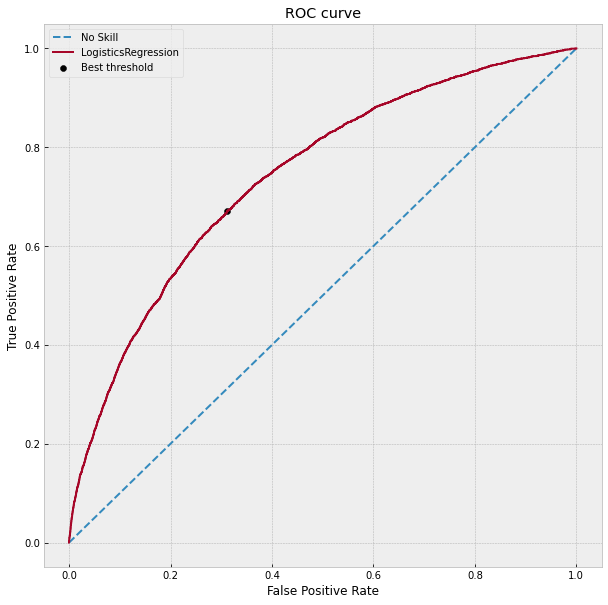

In [53]:
# %%flake8

# calculate roc curves for model
fpr, tpr, thresholds = roc_curve(y_sample2_test, y_predict)

# calculate the g-mean for each threshold of LogisticsRegression
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, \
      G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.figure(figsize=(10, 10))

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='LogisticsRegression')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black',
            label='Best threshold')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
# show the plot
plt.show()

## Precision-Recall curve

invalid value encountered in true_divide


Best Threshold=0.438926, F-Score=0.293


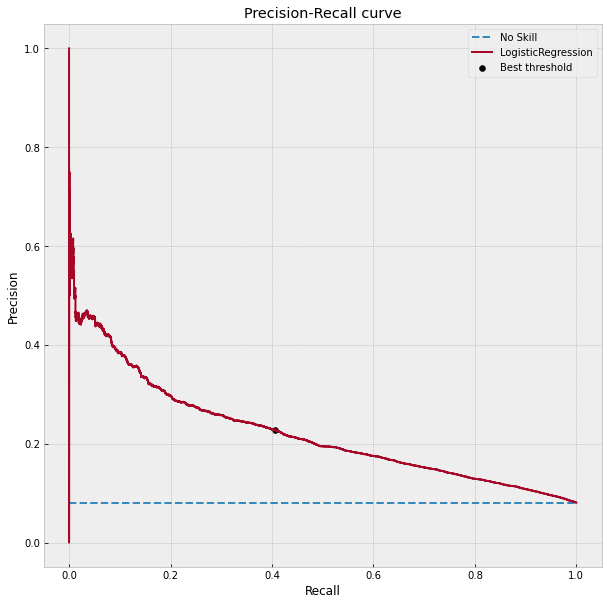

In [54]:
# %%flake8

# calculate Precision-Recall curve for model
precision, recall, thresholds = precision_recall_curve(y_sample2_test,
                                                       y_predict)

# convert to fscore for model
# fscore = (2 * precision * recall) / (precision + recall)
fscore = np.where((precision == 0) & (recall == 0), 0,
                  (2 * precision * recall)/(precision + recall))

# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
plt.figure(figsize=(10, 10))

no_skill = len(y_sample2_test[y_sample2_test == 1]) / len(y_sample2_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

plt.plot(recall, precision, label='LogisticRegression')
plt.scatter(recall[ix], precision[ix], marker='o',
            color='black', label='Best threshold')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
# show the plot
plt.show()

## Threshold optimization

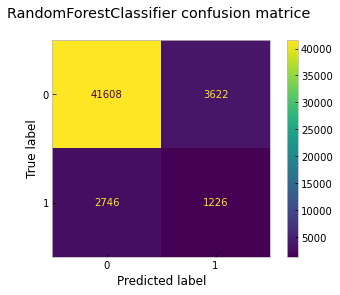

In [55]:
cm = confusion_matrix(y_sample2_test, (y_predict >= 0.5).astype('int'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(None)
plt.title('RandomForestClassifier confusion matrice \n')
plt.show()

In [56]:
# %%flake8
def custom_score(y_test,y_predict):
    tn, fp, fn, tp = confusion_matrix(y_test, (y_predict >= 0.5).astype('int')).ravel()
    tn_weight = 1
    fp_weight = 0
    fn_weight = -10
    tp_weight = 0

    # Full negative and positive cases
    real_negative = tn + fp # total true not-default
    real_positive = tp + fn # total true default

    gain = tp*tp_weight + tn*tn_weight + fp*fp_weight + fn*fn_weight
    best = real_negative*tn_weight + real_positive*tp_weight
    # worst = P*FN_value + N*FP_value
    # baseline : strategy : “most_frequent” (N)
    baseline = real_negative*tn_weight + real_positive*fn_weight
    
    # normalize to get score between 0 (baseline) and 1
    custom_score = (gain - baseline) / (best - baseline)
    
    #custom_score = 1-(fn*fn_weight + fp*fp_weight)/(real_negative+real_positive)
    return custom_score

In [57]:
# evaluate the model with custom_score and thresholds = 0.5
score_base_cs = custom_score(y_sample2_test, (y_predict >= 0.5).astype('int'))
print('Custom score without threshold optimized: %.5f' % score_base_cs)

Custom score without threshold optimized: 0.21747


In [58]:
# search thresholds for imbalanced classification

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold with custom_score
scores_cs = [custom_score(y_sample2_test, to_labels(y_predict, t)) for t in thresholds]
# get best threshold
ix_cs = np.argmax(scores_cs)
print('Best score with : \nThreshold=%.3f, Custom_score=%.5f' % (thresholds[ix_cs], scores_cs[ix_cs]))

Best score with : 
Threshold=0.318, Custom_score=0.32085


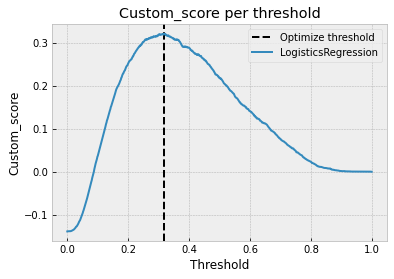

In [59]:
# display graph of Custom_score per threshold
plt.axvline(x=thresholds[ix_cs], color='black', linestyle='--', label='Optimize threshold')
plt.plot(thresholds, scores_cs, label='LogisticsRegression')
plt.xlabel('Threshold')
plt.ylabel('Custom_score')
plt.title('Custom_score per threshold')
plt.legend()
plt.show()

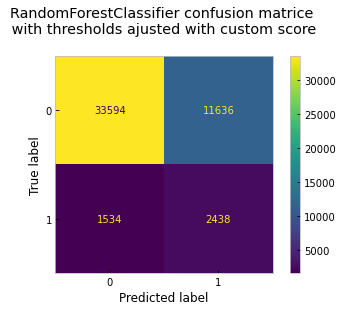

Threshold=0.318


In [60]:
cm_optimized_cs = confusion_matrix(y_sample2_test, (y_predict >= thresholds[ix_cs]).astype('int'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_cs)
disp.plot()
plt.grid(None)
plt.title('RandomForestClassifier confusion matrice \n with thresholds ajusted with custom score \n')
plt.show()
print('Threshold=%.3f' % (thresholds[ix_cs]))

In [61]:
# evaluate the model with f2beta and thresholds = 0.5
score_base_fbs = fbeta_score(y_sample2_test, (y_predict >= 0.5).astype('int'), beta=2)
print('F2score without threshold optimized: %.5f' % score_base_fbs)

F2score without threshold optimized: 0.29562


In [62]:
# search thresholds for imbalanced classification

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold with f2beta
scores_fbs = [fbeta_score(y_sample2_test, to_labels(y_predict, t), beta=2) for t in thresholds]
# get best threshold
ix_fbs = np.argmax(scores_fbs)
print('Best score with : \nThreshold=%.3f, F2score=%.5f' % (thresholds[ix_fbs], scores_fbs[ix_fbs]))

Best score with : 
Threshold=0.302, F2score=0.40820


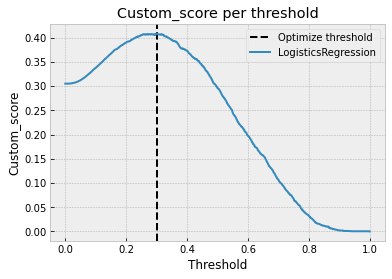

In [63]:
# display graph of Custom_score per threshold
plt.axvline(x=thresholds[ix_fbs], color='black', linestyle='--', label='Optimize threshold')
plt.plot(thresholds, scores_fbs, label='LogisticsRegression')
plt.xlabel('Threshold')
plt.ylabel('Custom_score')
plt.title('Custom_score per threshold')
plt.legend()
plt.show()

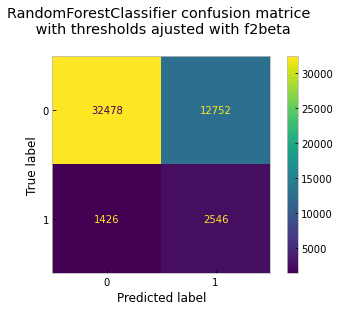

Threshold=0.302


In [64]:
cm_optimized_fbs = confusion_matrix(y_sample2_test, (y_predict >= thresholds[ix_fbs]).astype('int'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_fbs)
disp.plot()
plt.grid(None)
plt.title('RandomForestClassifier confusion matrice \n with thresholds ajusted with f2beta\n')
plt.show()
print('Threshold=%.3f' % (thresholds[ix_fbs]))

## Model evaluation

In [65]:
# %%flake8
# evaluate mode on test datas (X_test and y_test)

# predict probabilities for model on X_test datas
y_test_predict = predict_proba_y(model, X_test)

In [66]:
# score with custom score
score_test_cs = custom_score(y_test, (y_test_predict >= thresholds[ix_cs]).astype('int'))

# score with f2score
score_test_fbs = fbeta_score(y_test, (y_test_predict >= thresholds[ix_fbs]).astype('int'), beta=2)

In [67]:
# display score for train and test datas
print('Custom score on Train datas : %.3f' %scores_cs[ix_cs])
print('Custom score on Test datas : %.3f' %score_test_cs)
print('\n') 
print('F2score on Train datas : %.3f' %scores_fbs[ix_cs])
print('F2score on Test datas : %.3f' %score_test_fbs)

Custom score on Train datas : 0.321
Custom score on Test datas : 0.323


F2score on Train datas : 0.407
F2score on Test datas : 0.412


 ## Explain the model

In [68]:
import shap

#load JS
shap.initjs()

In [69]:
# preprocessing datas

# create a preprocessing pipeline: remove classifier step of the model
pipeline_preprocessing = imbpipeline(model.steps[:-1])

X_sample2_train_preproc, y_sample2_train_preproc = pipeline_preprocessing.fit_resample(X_sample2_train, y_sample2_train)

# convert to DataFrame for simplicity
X_sample2_train_preproc = pd.DataFrame(X_sample2_train_preproc, columns = features)

In [70]:
# fit datas with the model
classifier = model['classifier']
classifier.fit(X_sample2_train_preproc, y_sample2_train_preproc)

LogisticRegression(C=0.1, max_iter=10000, random_state=16)

In [71]:
explainer = shap.LinearExplainer(classifier, X_sample2_train_preproc)

In [72]:
shap_values = explainer(X_sample2_train_preproc)

### Global Interpretability

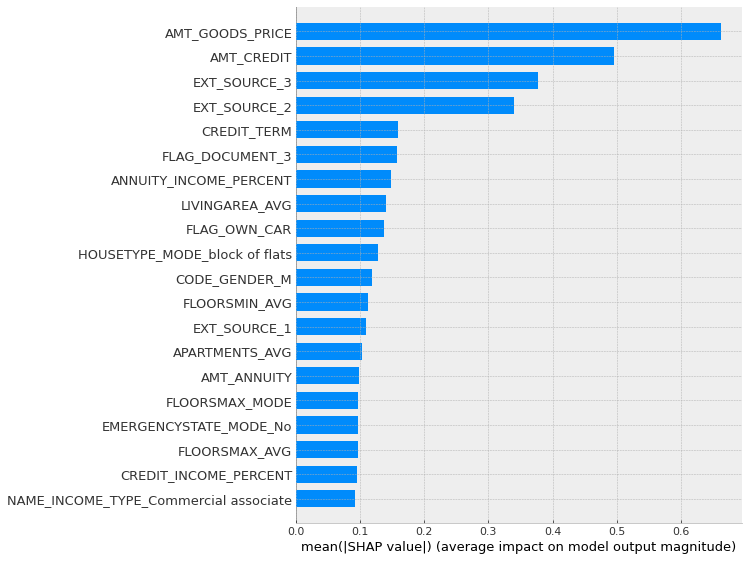

In [73]:
#plot the feature importance
shap.summary_plot(shap_values, X_sample2_train_preproc, plot_type="bar")

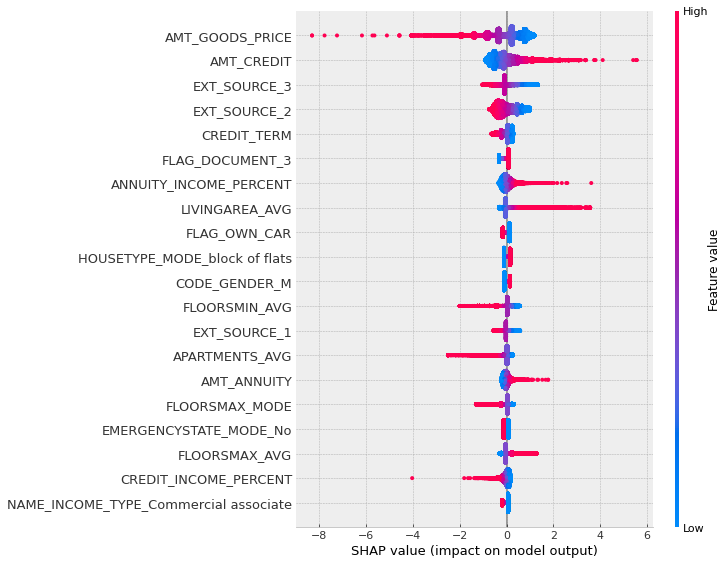

In [74]:
#plot the feature importance
shap.summary_plot(shap_values, X_sample2_train_preproc)

### Local Interpretability

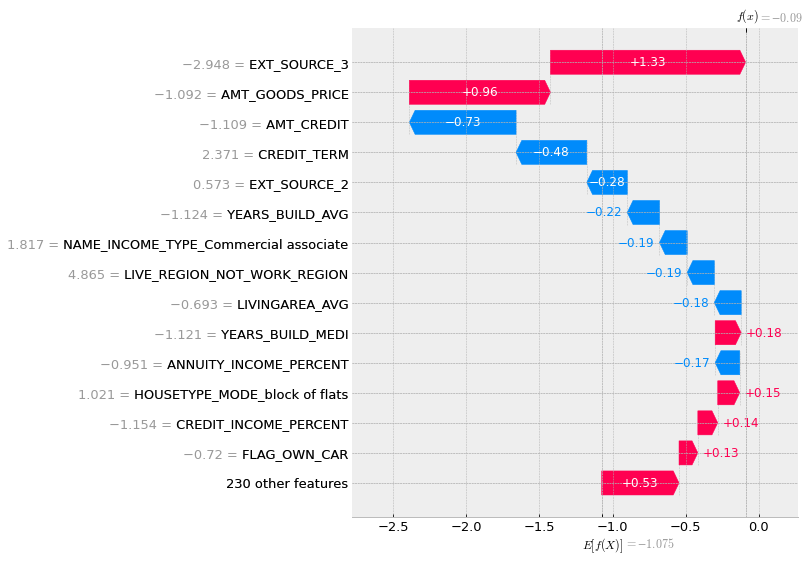

In [75]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0], max_display = 15)

In [76]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

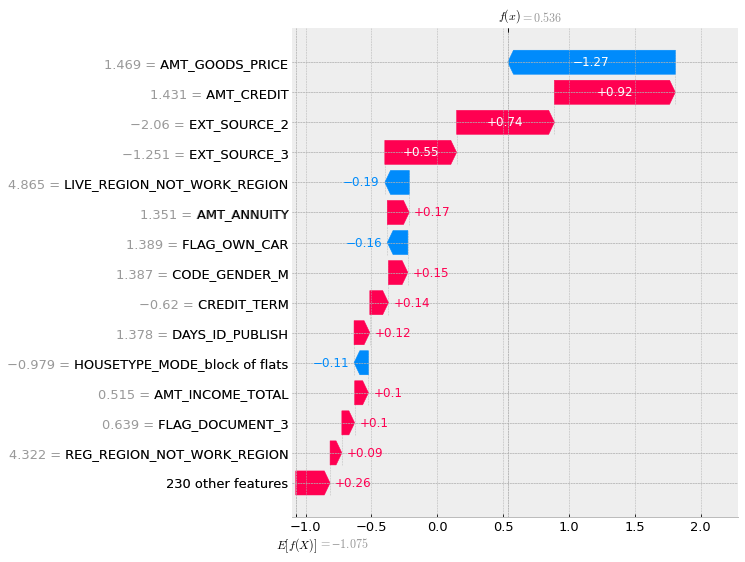

In [77]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[15], max_display = 15)

In [78]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[15])

In [79]:
pd.DataFrame(classifier.predict(X_sample2_train_preproc)).head(100)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Export model

In [99]:
# fit model on X_train
model.fit(X_train.values, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('over', SMOTE(random_state=16, sampling_strategy=0.1)),
                ('under',
                 RandomUnderSampler(random_state=16, sampling_strategy=0.4)),
                ['classifier',
                 LogisticRegression(C=0.1, max_iter=10000, random_state=16)]])

In [100]:
#create de pickle file of the pipeline_final
pickle.dump(model, open('models/model_classifier.pkl', 'wb'))

In [129]:
round(model.predict_proba(X[X['SK_ID_CURR']==456253].values.reshape(1,-1))[:, 1][0],4)

0.2286

In [104]:
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

In [130]:
X_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

In [134]:
# save datas to csv
X_sample2_test.to_csv('X_test.csv', index=False)